# LeNet-5
1. Data preparation
    -- load data
    -- padding image (28*28 --> 32*32)
    -- dimensionality expanding
2. AlexNet-5 Model

3. Model training and test

In [14]:
import numpy as np
import keras
import keras.layers as layers
import matplotlib.pyplot as plt


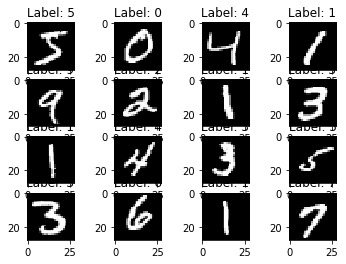

training set shape: (60000, 28, 28) 
test set shape: (10000, 28, 28)
training set shape: (60000, 32, 32) 
test set shape: (10000, 32, 32)
training set shape: (60000, 32, 32, 1) 
test set shape: (10000, 32, 32, 1)
First 10 labels:  [5 0 4 1 9 2 1 3 1 4]
First 10 one-hot labels:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [2]:
def load_digits2d(show_sample = True):
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()  
    
    #show first 16 images
    if show_sample == True:
        nImg = 4
        for i in range(nImg*nImg):
            plt.subplot(nImg, nImg, i+1)
            plt.imshow(x_train[i], cmap = 'Greys_r')
            plt.title('Label: %d' % (y_train[i]))
        plt.show()
    
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = load_digits2d(show_sample = True)
print('training set shape:', x_train.shape, '\r\ntest set shape:', x_test.shape)

x_train_1 = np.pad(x_train, ((0,0), (2,2),(2,2)), 'constant')
x_test_1 = np.pad(x_test, ((0,0), (2,2),(2,2)), 'constant')
print('training set shape:', x_train_1.shape, '\r\ntest set shape:', x_test_1.shape)

x_train_2 = np.expand_dims(x_train_1, axis = 3)
x_test_2 = np.expand_dims(x_test_1, axis = 3)

print('training set shape:', x_train_2.shape, '\r\ntest set shape:', x_test_2.shape)

y_train_onehot = keras.utils.to_categorical(y_train)
print('First 10 labels: ', y_train[:10])
print('First 10 one-hot labels: ', y_train_onehot[:10])

In [3]:
#LeNet-5 Architecure
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=10, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_1 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_2 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [4]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


history = model.fit(x_train_2, y_train_onehot,
                    batch_size=64, epochs=10,
                    verbose=1,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 205us/step - loss: 0.3094 - accuracy: 0.9286 - val_loss: 0.0977 - val_accuracy: 0.9711
Epoch 2/10
48000/48000 [==============================] - 9s 195us/step - loss: 0.0786 - accuracy: 0.9764 - val_loss: 0.0756 - val_accuracy: 0.9762
Epoch 3/10
48000/48000 [==============================] - 9s 190us/step - loss: 0.0531 - accuracy: 0.9832 - val_loss: 0.0666 - val_accuracy: 0.9801
Epoch 4/10
48000/48000 [==============================] - 9s 188us/step - loss: 0.0412 - accuracy: 0.9867 - val_loss: 0.0546 - val_accuracy: 0.9847
Epoch 5/10
48000/48000 [==============================] - 9s 190us/step - loss: 0.0360 - accuracy: 0.9883 - val_loss: 0.0675 - val_accuracy: 0.9812
Epoch 6/10
48000/48000 [==============================] - 9s 191us/step - loss: 0.0299 - accuracy: 0.9901 - val_loss: 0.0627 - val_accuracy: 0.9839
Epoch 7/10
48000/48000 [==============================] - 9s 

In [5]:
# test accuray
score = model.evaluate(x_test_2, keras.utils.to_categorical(y_test))
print('Test loss:', score[0])
print('Test accrcy:', score[1])

10000/10000 [==============================] - 1s 74us/step
Test loss: 0.039934174446453106
Test accrcy: 0.9889000058174133


In [6]:
#Simple Convolution NN 
from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        3200      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 256)        

In [7]:
#model train
model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(x_train_2, y_train_onehot,
                    batch_size=64, epochs=9,
                    verbose=1,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/9
48000/48000 [==============================] - 244s 5ms/step - loss: 0.4095 - accuracy: 0.8921 - val_loss: 0.0791 - val_accuracy: 0.9802
Epoch 2/9
48000/48000 [==============================] - 242s 5ms/step - loss: 0.1326 - accuracy: 0.9663 - val_loss: 0.0821 - val_accuracy: 0.9794
Epoch 3/9
48000/48000 [==============================] - 242s 5ms/step - loss: 0.1258 - accuracy: 0.9681 - val_loss: 0.0958 - val_accuracy: 0.9761
Epoch 4/9
48000/48000 [==============================] - 242s 5ms/step - loss: 0.1143 - accuracy: 0.9718 - val_loss: 0.0764 - val_accuracy: 0.9796
Epoch 5/9
48000/48000 [==============================] - 242s 5ms/step - loss: 0.1006 - accuracy: 0.9758 - val_loss: 0.0672 - val_accuracy: 0.9824
Epoch 6/9
48000/48000 [==============================] - 242s 5ms/step - loss: 0.1000 - accuracy: 0.9768 - val_loss: 0.0745 - val_accuracy: 0.9804
Epoch 7/9
48000/48000 [==============================] - 236s 5ms/st

In [8]:
#Training Accuracy
y_train_pred = model.predict_classes(x_train_2, verbose=0)
correct_preds = np.sum(np.argmax(y_train_onehot, axis=1) == y_train_pred,axis = 0)
train_acc = correct_preds / x_train_2.shape[0]
print('Training Accrcy: %2f%%' % (train_acc*100))

Training Accrcy: 98.508333%


In [9]:
for j in range(10):
    count = 0 
    cnt = 0
    for i in range(len(y_train_onehot)):
        
        if np.argmax(y_train_onehot[i],axis = 0) == j:
            count += 1
            if y_train_pred[i] == np.argmax(y_train_onehot[i],axis = 0):
                cnt +=1
    print(j,cnt/count*100)

0 99.6285666047611
1 99.1990507267873
2 99.31184961396443
3 98.04273364867069
4 97.50085587127695
5 99.04076738609112
6 98.64819195674214
7 98.99441340782123
8 96.06904802597846
9 98.53756933938477


In [10]:
# test accuray
y_test_one = keras.utils.to_categorical(y_test)
score = model.evaluate(x_test_2, y_test_one)

10000/10000 [==============================] - 11s 1ms/step


In [11]:
y_test_pred = model.predict_classes(x_test_2, verbose=0)
correct_preds = np.sum(np.argmax(y_test_one, axis=1) == y_test_pred, axis=0)
test_acc = correct_preds / x_test_2.shape[0]
print('Test Accrcy: %.2f%%' % (test_acc * 100)) 

Test Accrcy: 98.44%


In [12]:
for j in range(10):
    count = 0 
    cnt = 0
    for i in range(len(y_test_one)):
        if np.argmax(y_test_one[i],axis = 0) == j:
            count += 1
            if y_test_pred[i] == np.argmax(y_test_one[i],axis = 0):
                cnt +=1
    print(j,cnt/count*100)

0 99.18367346938776
1 98.6784140969163
2 99.51550387596899
3 98.11881188118812
4 97.9633401221996
5 99.2152466367713
6 97.7035490605428
7 98.83268482490273
8 97.5359342915811
9 97.62140733399404


In [13]:
correct_preds = np.sum(np.argmax(y_test_one, axis=1) == y_test_pred, axis=0)
test_acc = correct_preds / x_test_2.shape[0]
print('Test accrcy: %.2f%%' % (test_acc * 100)) 
#print(y_test_pred.shape)

Test accrcy: 98.44%
